## 데이터 불러오기

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten,  GlobalAveragePooling1D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding,Concatenate, GRU
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.callbacks import EarlyStopping, ModelCheckpoint
%matplotlib inline

In [2]:
import pandas as pd
import csv
df1= pd.read_csv('/content/drive/MyDrive/NL_BO_BEST_LOAN_BOOK_HISTORY_202104.csv',encoding="CP949")
df2=pd.read_csv('/content/drive/MyDrive/NL_BO_BEST_LOAN_BOOK_HISTORY_202111.csv',encoding="CP949")
df3=pd.read_csv('/content/drive/MyDrive/NL_BO_BEST_LOAN_BOOK_HISTORY_202109.csv',encoding="CP949")
df4=pd.read_csv('/content/drive/MyDrive/NL_BO_BEST_LOAN_BOOK_HISTORY_202107.csv',encoding="CP949")


df = pd.concat([df1,df2, df3,df4])

In [ ]:
df.duplicated(['BOOK_TITLE_NM']).sum()

23679

In [3]:
df.drop_duplicates(['BOOK_TITLE_NM'], inplace=True)

In [ ]:
df

,SEQ_NO,RANK_CO,INPT_DE,ISBN_THIRTEEN_NO,BOOK_TITLE_NM,AUTHR_NM,BOOK_INTRCN_CN,PUBLISHER_NM,PBLICTE_DE,BOOK_IMAGE_NM,...,LON_CO,ANALS_PD_CD,ANALS_PD_CD_NM,ANALS_TY_CD,ANALS_TY_CD_NM,AGE_FLAG_NM,AREA_NM,SEXDSTN_FLAG_NM,VLM_NM,ANALS_LON_TOT_CO
0,267869911,984,2021-04-15,9.788980e+12,김상욱의 양자 공부 :완전히 새로운 현대 물리학 입문,지은이: 김상욱,양자 역학의 탄생부터 최전선까지 모든 역사와 20세기 물리학의 ‘제자백가’들이 펼치...,사이언스북스,2017,https://image.aladin.co.kr/product/11380/16/co...,...,48,p3,90일,5,연령 및 성별,20대,NaN,여성,NaN,547138
1,267869910,984,2021-04-15,9.788980e+12,눈물을 마시는 새,이영도 지음,로 한국 판타지소설계의 정상에 선 이영도의 신작이 출간됐다. 이전 작품들에서 한 걸...,황금가지,2003,https://bookthumb-phinf.pstatic.net/cover/001/...,...,48,p3,90일,5,연령 및 성별,20대,NaN,여성,1,547138
2,267869908,984,2021-04-15,9.788970e+12,나의 라임 오렌지나무,J. M. 데 바스콘셀로스,우리 나라 독자들에게 많은 사랑을 받아온 가 완역본 보급판으로 재출간됐다. 100여...,동녘,2010,https://bookthumb-phinf.pstatic.net/cover/014/...,...,48,p3,90일,5,연령 및 성별,20대,NaN,여성,NaN,547138
3,267869855,929,2021-04-15,9.791160e+12,(N잡하는 허대리의) 월급 독립 스쿨 :돈 버는 재미를 잃어버린 직장인을 위한,지은이: N잡하는 허대리,"평범한 직장인에서 월급 외 수익 1,000만 원을 달성한 동시에 ‘N잡하는 허대리’...",Tornado(토네이도),2020,https://image.aladin.co.kr/product/24341/4/cov...,...,50,p3,90일,5,연령 및 성별,20대,NaN,여성,NaN,547138
4,267714443,196,2021-04-15,9.788960e+12,쉿! 신데렐라는 시계를 못 본대 :길이 재기와 시계 보기,글: 고자현 ;그림: 김명곤,초등 1.2학년 수학동화 시리즈 1권. ‘길이 재기와 시계 보기(측정)’에 관련된 ...,동아사이언스,2010,https://bookthumb-phinf.pstatic.net/cover/062/...,...,2,p1,7일,3,지역별,NaN,경북,NaN,NaN,8070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11182,282950623,734,2021-07-15,9.788940e+12,걸리버 여행기,조나단 스위프트 원작;윤유리 그림,"Part 1에서는 우선 명작을 패러디한 만화로 작품의 줄거리, 주제를 한눈에 살펴본...",대한교과서,2005,http://image.aladin.co.kr/product/60/88/cover/...,...,3,p1,7일,3,지역별,NaN,전남,NaN,2,37928
11183,282949919,163,2021-07-15,9.788960e+12,"Thanks, cooking robot!",기획·글: 책아책아! 영어 콘텐츠 연구소 ;그림: 박하영,NaN,여원미디어·한국가드너,2010,NaN,...,6,p1,7일,3,지역별,NaN,전남,NaN,1,37928
11185,282941729,35,2021-07-15,9.780200e+12,"Project X Alien Adventures: Grey Book Band, Ox...","토니 브레드먼, James Noble, Mike Tucker, Jacqueline ...",NaN,Oxford University Press,2014,https://image.aladin.co.kr/product/18681/39/co...,...,12,p1,7일,3,지역별,NaN,대전,NaN,NaN,65856
11189,283011660,917,2021-07-15,9.788960e+12,가족을 지켜라!,"김바다 (지은이), 국은오 (그림)",다른 집들과 마찬가지로 지우네도 코로나19로 인하여 외출도 외식도 한 지 오래였다....,단비어린이,2021,https://image.aladin.co.kr/product/26612/6/cov...,...,18,p2,30일,3,지역별,NaN,충남,NaN,NaN,276829


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31227 entries, 0 to 11192
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SEQ_NO             31227 non-null  int64  
 1   RANK_CO            31227 non-null  int64  
 2   INPT_DE            31227 non-null  object 
 3   ISBN_THIRTEEN_NO   31227 non-null  float64
 4   BOOK_TITLE_NM      31226 non-null  object 
 5   AUTHR_NM           31191 non-null  object 
 6   BOOK_INTRCN_CN     27496 non-null  object 
 7   PUBLISHER_NM       30596 non-null  object 
 8   PBLICTE_DE         31022 non-null  object 
 9   BOOK_IMAGE_NM      29076 non-null  object 
 10  BOOK_MASTR_SEQ_NO  31227 non-null  int64  
 11  KDC_NM             23528 non-null  object 
 12  LON_CO             31227 non-null  int64  
 13  ANALS_PD_CD        31227 non-null  object 
 14  ANALS_PD_CD_NM     31227 non-null  object 
 15  ANALS_TY_CD        31227 non-null  int64  
 16  ANALS_TY_CD_NM     312

In [4]:
data = df[['BOOK_TITLE_NM','AUTHR_NM','BOOK_INTRCN_CN']]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31227 entries, 0 to 11192
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   BOOK_TITLE_NM   31226 non-null  object
 1   AUTHR_NM        31191 non-null  object
 2   BOOK_INTRCN_CN  27496 non-null  object
dtypes: object(3)
memory usage: 975.8+ KB


In [ ]:
data.isnull().sum()

BOOK_TITLE_NM          1
AUTHR_NM              36
BOOK_INTRCN_CN      3731
PUBLISHER_NM         631
ANALS_LON_TOT_CO       0
dtype: int64

In [5]:
data.dropna(inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27494 entries, 0 to 11192
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   BOOK_TITLE_NM     27494 non-null  object
 1   AUTHR_NM          27494 non-null  object
 2   BOOK_INTRCN_CN    27494 non-null  object
 3   PUBLISHER_NM      27494 non-null  object
 4   ANALS_LON_TOT_CO  27494 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.3+ MB


In [ ]:
# data['ANALS_LON_TOT_CO'].describe() #분석대출총수

count    2.749400e+04
mean     2.323016e+05
std      1.003440e+06
min      1.059000e+03
25%      5.871000e+03
50%      3.538900e+04
75%      1.350880e+05
max      2.648140e+07
Name: ANALS_LON_TOT_CO, dtype: float64

In [ ]:
# data['popular'] = data['ANALS_LON_TOT_CO'].apply(lambda x: 1 if x >= 3.538900e+04  else 0) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
# data['popular'].value_counts()

1    13823
0    13671
Name: popular, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


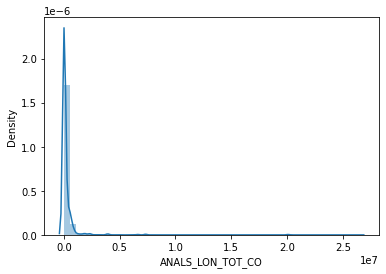

In [ ]:
# import seaborn as sns
# sns.distplot(data['ANALS_LON_TOT_CO'])

In [6]:
data.reset_index(drop=True, inplace=True)

## 추천시스템

In [7]:
# tfidf = TfidfVectorizer(max_features=15)
# tfidf_matrix = tfidf.fit_transform(data['BOOK_INTRCN_CN'])

In [8]:
# tfidf_matrix.shape

(27494, 15)

In [9]:
# dtm_tfidf = pd.DataFrame(tfidf_matrix.todense(), columns=tfidf.get_feature_names())
# dtm_tfidf

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,and,gt,lt,of,the,to,다양한,대한,시리즈,이야기를,있는,있다,작가,통해,함께
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.664756,0.74706
3,0.0,0.0,0.0,0.0,0.0,0.0,0.805964,0.0,0.000000,0.0,0.591965,0.000000,0.000000,0.000000,0.00000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.747423,0.0,0.000000,0.664349,0.000000,0.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27489,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.00000
27490,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000
27491,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.756754,0.653700,0.00000
27492,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000


In [7]:
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(data['BOOK_INTRCN_CN'])

In [9]:
#코사인 유사도
cosine_sim= cosine_similarity(tfidf_matrix, tfidf_matrix)
cosine_sim.shape

(27494, 27494)

In [10]:
a_li=[]
def recommend(title):
  for i in data['BOOK_TITLE_NM']:
    if title in str(i):
      a_li.append(i)

recommend('스파이더맨')

In [11]:
a_li[0]

'스파이더맨 지퍼 '

In [12]:
title_to_index = dict(zip(data['BOOK_TITLE_NM'], data.index))

idx = title_to_index[a_li[0]]
print(idx)

23235


In [13]:
sim_scores = list(enumerate(cosine_sim[idx]))
sim_scores = sorted(sim_scores, key=lambda x:x[1], reverse=True)
sim_scores = sim_scores[0:11]
sim_scores

[(23235, 1.0),
 (25062, 0.08047700066943765),
 (26388, 0.07868882833881248),
 (24612, 0.0738451907818454),
 (17472, 0.07330128399574437),
 (25106, 0.07330128399574437),
 (27354, 0.07327358000469629),
 (13077, 0.07097141691791417),
 (5251, 0.06782896389561706),
 (26957, 0.06669973630046622),
 (14652, 0.06150331492517986)]

In [14]:
movie_indices = [idx[0] for idx in sim_scores]
movie_indices

[23235, 25062, 26388, 24612, 17472, 25106, 27354, 13077, 5251, 26957, 14652]

In [15]:
data['BOOK_TITLE_NM'].iloc[movie_indices]

23235                스파이더맨 지퍼 
25062            엄마, 어떻게 알았어? 
26388                 공룡 입양하기 
24612                 진짜 엄마 찾기
17472    엄마의 이상한 출근길 :김영진 그림책 
25106              엄마의 이상한 출근길
27354          내 꿈은 엄마 꿈과 달라요 
13077           튀김이 떡볶이에 빠진 날 
5251              짜장면 배달 왔어요! 
26957        스파이더맨 내게 화학을 알려줘 
14652               책을 구한 고양이 
Name: BOOK_TITLE_NM, dtype: object

In [16]:
def get_recommendation(title,cosine_sim = cosine_sim):
  a_li=[]
  for i in data['BOOK_TITLE_NM']:
    if title in str(i):
      a_li.append(i)
  #선택한 책의 타이틀로부터 해당 책의 인덱스를 받아온다
  idx = title_to_index[a_li[0]]

  #해당 책와 모든 책와의 유사도
  sim_scores = list(enumerate(cosine_sim[idx]))

  #유사도에 따라 책 정렬
  sim_scores1 = sorted(sim_scores, key=lambda x:x[1], reverse=True)

  #가장 유사한 10개의 책
  sim_scores2 = sim_scores1[0:11]

  #가장 유사한 10개의 책의 인덱스
  movie_indices = [idx[0] for idx in sim_scores2]

  #가장 유사한 10개의 책의 제목
  return data['BOOK_TITLE_NM'].iloc[movie_indices]


In [20]:
get_recommendation('나의 라임')

2                                       나의 라임 오렌지나무
16382                                      밤 기차 여행 
21364                         사랑의 역사 :니콜 크라우스 장편소설 
14362                                  사냥꾼을 만난 꼬마곰 
18497          지금은 나만의 시간입니다 - 인생을 리셋하는 혼자 있는 시간의 힘
20022                                     아빠 해마 이야기
12817                                             난
17554    하루 5분, 명화를 읽는 시간 :내 방에서 즐기는 반전 가득한 명화 이야기 
4611                             (어린이를 위한) 우동 한 그릇 
5410                              (그림책) 돌 씹어 먹는 아이 
16732                                 넌 어떻게 춤을 추니? 
Name: BOOK_TITLE_NM, dtype: object

## 딥러닝,,,

In [ ]:
data

,BOOK_TITLE_NM,AUTHR_NM,BOOK_INTRCN_CN
0,김상욱의 양자 공부 :완전히 새로운 현대 물리학 입문,지은이: 김상욱,양자 역학의 탄생부터 최전선까지 모든 역사와 20세기 물리학의 ‘제자백가’들이 펼치...
1,눈물을 마시는 새,이영도 지음,로 한국 판타지소설계의 정상에 선 이영도의 신작이 출간됐다. 이전 작품들에서 한 걸...
2,나의 라임 오렌지나무,J. M. 데 바스콘셀로스,우리 나라 독자들에게 많은 사랑을 받아온 가 완역본 보급판으로 재출간됐다. 100여...
3,(N잡하는 허대리의) 월급 독립 스쿨 :돈 버는 재미를 잃어버린 직장인을 위한,지은이: N잡하는 허대리,"평범한 직장인에서 월급 외 수익 1,000만 원을 달성한 동시에 ‘N잡하는 허대리’..."
4,쉿! 신데렐라는 시계를 못 본대 :길이 재기와 시계 보기,글: 고자현 ;그림: 김명곤,초등 1.2학년 수학동화 시리즈 1권. ‘길이 재기와 시계 보기(측정)’에 관련된 ...
...,...,...,...
27489,Gorilla (고릴라),Anthony Browne,너무나 바쁜 아빠 대신 아빠가 사준 고릴라 인형과 즐거운 한 때를 보내는 한나. 섬...
27490,그림책의 책 :100개의 주제로 엮은 그림책 북큐레이션 북,제님 지음,15년간 기록한 1만여 권의 목록에서 1300여 권의 그림책을 엄선하여 100개의 ...
27491,걸리버 여행기,조나단 스위프트 원작;윤유리 그림,"Part 1에서는 우선 명작을 패러디한 만화로 작품의 줄거리, 주제를 한눈에 살펴본..."
27492,가족을 지켜라!,"김바다 (지은이), 국은오 (그림)",다른 집들과 마찬가지로 지우네도 코로나19로 인하여 외출도 외식도 한 지 오래였다....


In [ ]:
pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 1.3 MB/s 
     |████████████████████████████████| 465 kB 56.0 MB/s 


### [전처리](https://wonhwa.tistory.com/35) 이건 일단 보지마

In [ ]:
#전처리 함수
import re
def preprocessing(text, okt, remove_stopwords=False, stop_words=[]):
  text_en = re.sub('[^가-힣ㄱ-ㅎa-zA-z]','',text)

  if remove_stopwords:
    word_text = [token for token in word_text if not token in stop_words]
  return word_text

In [ ]:
data['BOOK_INTRCN_CN'][:10]

0    양자 역학의 탄생부터 최전선까지 모든 역사와 20세기 물리학의 ‘제자백가’들이 펼치...
1    로 한국 판타지소설계의 정상에 선 이영도의 신작이 출간됐다. 이전 작품들에서 한 걸...
2    우리 나라 독자들에게 많은 사랑을 받아온 가 완역본 보급판으로 재출간됐다. 100여...
3    평범한 직장인에서 월급 외 수익 1,000만 원을 달성한 동시에 ‘N잡하는 허대리’...
4    초등 1.2학년 수학동화 시리즈 1권. ‘길이 재기와 시계 보기(측정)’에 관련된 ...
5    새롭게 바뀐 수학 교육 과정에 맞추어 수학 내용과 관련 있는 소재와 상황 등을 동화...
6    단비어린이 문화.교양 시리즈. 어린이가 일찍 스마트폰을 접했을 때 발생하는 각종 폐...
7    고증을 통한 상세하고 친근한 그림으로 표현되어 있고, 코믹한 반전 스토리로 구성되어...
8    북멘토 가치동화 22권. 집이라는 사적인 공간에서 지속적이고 은밀하게 행해지는 ‘가...
9    가장 고귀한 신분으로 태어났지만 가장 외롭게 생을 마감했던 덕혜옹주에 관한 소설이다...
Name: BOOK_INTRCN_CN, dtype: object

In [ ]:
stop_words = ['은','는','이','가','하','아','것','에게','를','에',
              '들','을','로','의','있','되','수','보','주','등','한','다']
okt = Okt()
clean_train_text = []

for text in data['BOOK_INTRCN_CN']:
  # 리뷰가 문자열인 경우만 전처리 진행
  if type(text) == str:
    clean_train_text.append(preprocessing(text,okt,remove_stopwords=True,stop_words= stop_words))
  else:
    clean_train_text.append([]) #str이 아닌 행은 빈칸으로 놔두기

clean_train_text[:4]

KeyboardInterrupt: ignored

In [ ]:
print(f'학습 데이터에 있는 문서의 평균 토큰 수: {np.mean([len(sent) for sent in clean_train_text], dtype=int)}')


학습 데이터에 있는 문서의 평균 토큰 수: 41


In [ ]:
# 인덱스 벡터 변환 후 일정 길이 넘어가거나 모자라는 리뷰 패딩처리
tokenizer = Tokenizer()
tokenizer.fit_on_texts(clean_train_text)
train_sequences = tokenizer.texts_to_sequences(clean_train_text)


word_vocab = tokenizer.word_index #단어사전형태
MAX_SEQUENCE_LENGTH = 50 #문장 최대 길이

#학습 데이터
train_inputs = pad_sequences(train_sequences,maxlen=MAX_SEQUENCE_LENGTH,padding='post')



In [ ]:
train_inputs[0]

array([607, 178,  90, 608,  34,  91,  21,   3, 609, 610, 611, 612, 613,
         2, 614, 615, 616, 114, 617,  18,  52, 324, 179,  35, 180, 325,
       326, 618, 619, 620, 621, 327, 622,   3, 181, 182, 623, 183, 624,
       625, 626,   0,   0,   0,   0,   0,   0,   0,   0,   0], dtype=int32)

### vocab에 저장 후 encoded
[vocab](https://wikidocs.net/99893)

In [8]:
pip install tokenizers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 7.6 MB 36.6 MB/s 


In [9]:
import pandas as pd
import urllib.request
from tokenizers import BertWordPieceTokenizer

urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")

('ratings.txt', <http.client.HTTPMessage at 0x7f86b4868f10>)

In [10]:
naver_df = pd.read_table('ratings.txt')
naver_df = naver_df.dropna(how='any')
with open('naver_review.txt', 'w', encoding='utf8') as f:
    f.write('\n'.join(naver_df['document']))

In [11]:
tokenizer = BertWordPieceTokenizer(lowercase=False, strip_accents=False)

In [12]:
data_file = 'naver_review.txt'
vocab_size = 30000
limit_alphabet = 6000
min_frequency = 5

tokenizer.train(files=data_file,
                vocab_size=vocab_size,
                limit_alphabet=limit_alphabet,
                min_frequency=min_frequency)

In [13]:
# vocab 저장
tokenizer.save_model('./')

['./vocab.txt']

In [14]:
# vocab 로드
df = pd.read_fwf('vocab.txt', header=None)
df

,0
0,[PAD]
1,[UNK]
2,[CLS]
3,[SEP]
4,[MASK]
...,...
29995,말밖에는
29996,맘을
29997,맛도
29998,망하지


In [ ]:
encoded = tokenizer.encode('양자 역학의 탄생부터 최전선까지 모든 역사와 20세기 물리학의 ‘제자백가’들이 펼치')
print('토큰화 결과 :',encoded.tokens)
print('정수 인코딩 :',encoded.ids)
print('디코딩 :',tokenizer.decode(encoded.ids))

토큰화 결과 : ['양자', '역', '##학', '##의', '탄생', '##부터', '최', '##전', '##선', '##까지', '모든', '역사와', '20세기', '물리', '##학', '##의', '‘', '제', '##자', '##백', '##가', '’', '들이', '펼', '##치']
정수 인코딩 : [24599, 2193, 3389, 3255, 9426, 5953, 2694, 3238, 3237, 5866, 6078, 20885, 14651, 20128, 3389, 3255, 115, 2408, 3408, 3559, 3338, 116, 12463, 2991, 3318]
디코딩 : 양자 역학의 탄생부터 최전선까지 모든 역사와 20세기 물리학의 ‘ 제자백가 ’ 들이 펼치


### 데이터 분리, 인코딩(x)

In [15]:
# data['decoder_input']=data['BOOK_TITLE_NM'].apply(lambda x: '[PAD] '+x)
# data['decoder_target']=data['BOOK_TITLE_NM'].apply(lambda x: x+' [UNK]')
# data.head()

,BOOK_TITLE_NM,AUTHR_NM,BOOK_INTRCN_CN,decoder_input,decoder_target
0,김상욱의 양자 공부 :완전히 새로운 현대 물리학 입문,지은이: 김상욱,양자 역학의 탄생부터 최전선까지 모든 역사와 20세기 물리학의 ‘제자백가’들이 펼치...,[PAD] 김상욱의 양자 공부 :완전히 새로운 현대 물리학 입문,김상욱의 양자 공부 :완전히 새로운 현대 물리학 입문 [UNK]
1,눈물을 마시는 새,이영도 지음,로 한국 판타지소설계의 정상에 선 이영도의 신작이 출간됐다. 이전 작품들에서 한 걸...,[PAD] 눈물을 마시는 새,눈물을 마시는 새 [UNK]
2,나의 라임 오렌지나무,J. M. 데 바스콘셀로스,우리 나라 독자들에게 많은 사랑을 받아온 가 완역본 보급판으로 재출간됐다. 100여...,[PAD] 나의 라임 오렌지나무,나의 라임 오렌지나무 [UNK]
3,(N잡하는 허대리의) 월급 독립 스쿨 :돈 버는 재미를 잃어버린 직장인을 위한,지은이: N잡하는 허대리,"평범한 직장인에서 월급 외 수익 1,000만 원을 달성한 동시에 ‘N잡하는 허대리’...",[PAD] (N잡하는 허대리의) 월급 독립 스쿨 :돈 버는 재미를 잃어버린 직장인을...,(N잡하는 허대리의) 월급 독립 스쿨 :돈 버는 재미를 잃어버린 직장인을 위한 [...
4,쉿! 신데렐라는 시계를 못 본대 :길이 재기와 시계 보기,글: 고자현 ;그림: 김명곤,초등 1.2학년 수학동화 시리즈 1권. ‘길이 재기와 시계 보기(측정)’에 관련된 ...,[PAD] 쉿! 신데렐라는 시계를 못 본대 :길이 재기와 시계 보기,쉿! 신데렐라는 시계를 못 본대 :길이 재기와 시계 보기 [UNK]


In [ ]:
# aa =[]
# for i in data['BOOK_INTRCN_CN']:
#   a = tokenizer.encode(i)
#   aa.append(a.ids)

In [ ]:
# #토큰+벡터화+패딩
# def token(okok):
#   aa =[]
#   for i in okok:
#     a = tokenizer.encode(i)
#     aa.append(a.ids)
#   MAXLEN = np.mean([len(sent) for sent in aa]).astype('int')
#   bb= pd.Series(aa)
#   cc= pad_sequences(bb, maxlen=MAXLEN+10, padding='post')
#   return cc 

In [ ]:
# encode_input = token(data['BOOK_INTRCN_CN'])
# decode_input = token(data['decoder_input'])
# decode_target = token(data['decoder_target'])

In [ ]:
# text_max_len = len(encode_input[0])

In [ ]:
# title_max_len= len(decode_input[0])
# title_max_len

23

In [ ]:
#디코더 확인
# tokenizer.decode(decode_target[0])

'김상욱의 양자 공부 : 완전히 새로운 현대 물리학 입문'

In [ ]:
#데이터 분리!
# encoder_input_train, encoder_input_test= train_test_split(encode_input,test_size=0.2, random_state=42)
# decoder_input_train, decoder_input_test= train_test_split(decode_input,test_size=0.2, random_state=42)
# decoder_target_train, decoder_target_test= train_test_split(decode_target,test_size=0.2, random_state=42)


In [ ]:
# #순서에 맞게 잘 분리됨
# print(tokenizer.decode(encoder_input_train[5]),
# tokenizer.decode(decoder_input_train[5]),
# tokenizer.decode(decoder_target_train[5]), sep='\n')

똥과 도깨비 ' 라는 전래동화의 소재를 절묘하게 조화시킨 그림 동화집. 옛날 옛그림을 연상시키는 그림체가 화면을 가득 채우고, 단순하면서도 옛이야기 특유의 과장을 살린 글솜씨가 돋보이는 그림책이다.
똥벼락
똥벼락


## 데이터 전처리

In [16]:
pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [18]:
import numpy as np
import gensim
from urllib.request import urlretrieve, urlopen
import gzip
import zipfile
from nltk.tokenize import sent_tokenize, word_tokenize    

In [ ]:
# urlretrieve("http://nlp.stanford.edu/data/glove.6B.zip", filename="glove.6B.zip")
# zf = zipfile.ZipFile('glove.6B.zip')
# zf.extractall() 
# zf.close()

In [ ]:

# glove_dict = dict()
# f = open('glove.6B.100d.txt', encoding="utf8") # 100차원의 GloVe 벡터를 사용

# for line in f:
#     word_vector = line.split()
#     word = word_vector[0]
#     word_vector_arr = np.asarray(word_vector[1:], dtype='float32') # 100개의 값을 가지는 array로 변환
#     glove_dict[word] = word_vector_arr
# f.close()
     

In [19]:
data['decoder_input']=data['BOOK_TITLE_NM'].apply(lambda x: '[PAD] '+x)
data['decoder_target']=data['BOOK_TITLE_NM'].apply(lambda x: x+' [UNK]')
data.head()

,BOOK_TITLE_NM,AUTHR_NM,BOOK_INTRCN_CN,decoder_input,decoder_target
0,김상욱의 양자 공부 :완전히 새로운 현대 물리학 입문,지은이: 김상욱,양자 역학의 탄생부터 최전선까지 모든 역사와 20세기 물리학의 ‘제자백가’들이 펼치...,[PAD] 김상욱의 양자 공부 :완전히 새로운 현대 물리학 입문,김상욱의 양자 공부 :완전히 새로운 현대 물리학 입문 [UNK]
1,눈물을 마시는 새,이영도 지음,로 한국 판타지소설계의 정상에 선 이영도의 신작이 출간됐다. 이전 작품들에서 한 걸...,[PAD] 눈물을 마시는 새,눈물을 마시는 새 [UNK]
2,나의 라임 오렌지나무,J. M. 데 바스콘셀로스,우리 나라 독자들에게 많은 사랑을 받아온 가 완역본 보급판으로 재출간됐다. 100여...,[PAD] 나의 라임 오렌지나무,나의 라임 오렌지나무 [UNK]
3,(N잡하는 허대리의) 월급 독립 스쿨 :돈 버는 재미를 잃어버린 직장인을 위한,지은이: N잡하는 허대리,"평범한 직장인에서 월급 외 수익 1,000만 원을 달성한 동시에 ‘N잡하는 허대리’...",[PAD] (N잡하는 허대리의) 월급 독립 스쿨 :돈 버는 재미를 잃어버린 직장인을...,(N잡하는 허대리의) 월급 독립 스쿨 :돈 버는 재미를 잃어버린 직장인을 위한 [...
4,쉿! 신데렐라는 시계를 못 본대 :길이 재기와 시계 보기,글: 고자현 ;그림: 김명곤,초등 1.2학년 수학동화 시리즈 1권. ‘길이 재기와 시계 보기(측정)’에 관련된 ...,[PAD] 쉿! 신데렐라는 시계를 못 본대 :길이 재기와 시계 보기,쉿! 신데렐라는 시계를 못 본대 :길이 재기와 시계 보기 [UNK]


In [20]:
import re
def tokenization(sentences):
    return [tokenizer.encode(sentence).tokens for sentence in sentences]

stop_words = ['은','는','이','가','하','아','것','에게','를','에','와','과','까지','부터',
              '들','을','로','의','있','되','수','보','주','등','한','다','하다']
def preprocessing(sentence):
  sentence = [re.sub(r'[^가-힣a-zA-Z\s]', '', word) for word in sentence]
  return [word for word in sentence if word not in stop_words and word]

def preprocessing_sentences(sentences):
  return [preprocessing(sentence) for sentence in sentences]

In [21]:
#제목
data['title_input'] = data['decoder_input'].apply(sent_tokenize)
data['title_target'] = data['decoder_target'].apply(sent_tokenize)

data['tokenized_title_in']=data['title_input'].apply(tokenization)
data['tokenized_title_in'] = data['tokenized_title_in'].apply(preprocessing_sentences)

data['tokenized_title_ta']=data['title_target'].apply(tokenization)
data['tokenized_title_ta'] = data['tokenized_title_ta'].apply(preprocessing_sentences)

In [22]:
data['sentences'] = data['BOOK_INTRCN_CN'].apply(sent_tokenize)

In [23]:
data['tokenized_sentences']=data['sentences'].apply(tokenization)

In [24]:
data['tokenized_sentences'] = data['tokenized_sentences'].apply(preprocessing_sentences)

In [ ]:
# stop = {63, 11, 16}
# li=[i for i in tokenizer.encode(str(data['tokenized_sentences'][0])).ids if i not in stop]

In [ ]:
# ee=[]
# a= []
# for e in data['tokenized_sentences']:
#   for i in tokenizer.encode(str(e)).ids:
#     if i not in stop:
#       a.append(i)
#     ee.append(a)

In [25]:
data['token']=data['tokenized_sentences'].apply(lambda x: tokenizer.encode(str(x)).ids)

In [26]:
data['token_in']=data['tokenized_title_in'].apply(lambda x: tokenizer.encode(str(x)).ids)
data['token_ta']=data['tokenized_title_ta'].apply(lambda x: tokenizer.encode(str(x)).ids)


In [27]:
stopword = {63, 11, 16}

In [28]:
li=[]
for e in data['token']:
  a = [i for i in e if i not in stopword]
  li.append(a)
data['summary_num']=li

In [29]:
inn= []
for e in data['token_in']:
  a = [i for i in e if i not in stopword]
  inn.append(a)
data['summary_in'] = inn

In [30]:
targ= []
for e in data['token_ta']:
  a = [i for i in e if i not in stopword]
  targ.append(a)
data['summary_ta'] = targ

In [32]:
# data.drop(['suumary_num','token_in','token_ta'], inplace=True, axis=1)

In [35]:
data[['summary_num','summary_in','summary_ta']]

,summary_num,summary_in,summary_ta
0,"[[24600, 2193, 3047, 9426, 2694, 2394, 1857, 6...","[[52, 3353, 3837, 17857, 2269, 24600, 8381, 86...","[[17857, 2269, 24600, 8381, 8668, 6926, 7946, ..."
1,"[[5931, 6915, 6810, 643, 3265, 10255, 1857, 13...","[[52, 3353, 3837, 8335, 18869, 1829, 65, 65, 0...","[[8335, 18869, 1829, 57, 3940, 4632, 65, 65, 0..."
2,"[[5958, 7272, 1104, 2357, 3396, 6073, 7112, 81...","[[52, 3353, 3837, 6829, 1290, 2348, 2218, 1337...","[[6829, 1290, 2348, 2218, 1337, 6520, 1525, 57..."
3,"[[7798, 13661, 2340, 3343, 1854, 2285, 721, 22...","[[52, 3353, 3837, 50, 2365, 5937, 3087, 1050, ...","[[50, 2365, 5937, 3087, 1050, 1423, 3265, 2285..."
4,"[[16160, 3047, 3422, 17906, 7280, 6215, 694, 6...","[[52, 3353, 3837, 1959, 65, 15058, 25505, 1511...","[[1959, 65, 15058, 25505, 1511, 1646, 1050, 10..."
...,...,...,...
11176,"[[6291, 24525, 7096, 10383, 12646, 1813, 2471,...","[[52, 3353, 3837, 43, 20071, 77, 8764, 69, 236...","[[43, 20071, 77, 8764, 69, 23640, 57, 3940, 46..."
11178,"[[946, 568, 13126, 1438, 2192, 694, 1505, 1359...","[[52, 3353, 3837, 7026, 2640, 2640, 585, 3265,...","[[7026, 2640, 2640, 585, 3265, 15816, 2194, 70..."
11182,"[[52, 27426, 3883, 8907, 3366, 11098, 9465, 91...","[[52, 3353, 3837, 23634, 1610, 8658, 729, 65, ...","[[23634, 1610, 8658, 729, 57, 3940, 4632, 65, ..."
11189,"[[6017, 2522, 1162, 3405, 29720, 14408, 932, 1...","[[52, 3353, 3837, 11747, 8550, 1290, 65, 65, 0...","[[11747, 8550, 1290, 65, 57, 3940, 4632, 65, 6..."


In [34]:
data['summary_num']= data['summary_num'].apply(lambda x: pad_sequences([x], maxlen=84, padding='post'))
data['summary_in']=data['summary_in'].apply(lambda x: pad_sequences([x], maxlen=30, padding='post'))
data['summary_ta']=data['summary_ta'].apply(lambda x: pad_sequences([x], maxlen=30, padding='post'))


In [36]:
text_max_len=84
title_max_len=30

In [37]:
import itertools
xx =list(itertools.chain.from_iterable(data['summary_in']))
zz = []
for i in xx:
  zz.append(i.tolist())

In [38]:
np.array(zz)

array([[  52, 3353, 3837, ...,    0,    0,    0],
       [  52, 3353, 3837, ...,    0,    0,    0],
       [  52, 3353, 3837, ...,    0,    0,    0],
       ...,
       [  52, 3353, 3837, ...,    0,    0,    0],
       [  52, 3353, 3837, ...,    0,    0,    0],
       [  52, 3353, 3837, ...,    0,    0,    0]])

In [45]:
import itertools
xx =list(itertools.chain.from_iterable(data['summary_ta']))
ta = []
for i in xx:
  ta.append(i.tolist())

In [46]:
np.array(ta)

array([[17857,  2269, 24600, ...,     0,     0,     0],
       [ 8335, 18869,  1829, ...,     0,     0,     0],
       [ 6829,  1290,  2348, ...,     0,     0,     0],
       ...,
       [23634,  1610,  8658, ...,     0,     0,     0],
       [11747,  8550,  1290, ...,     0,     0,     0],
       [ 5933,  1537,  2211, ...,     0,     0,     0]])

In [ ]:
import itertools
xx =list(itertools.chain.from_iterable(data['summary_num']))
num = []
for i in xx:
  num.append(i.tolist())

In [ ]:
len(num)

27494

In [ ]:
#데이터 분리!
encoder_input_train, encoder_input_test= train_test_split(np.array(num),test_size=0.2, random_state=42)
decoder_input_train, decoder_input_test= train_test_split(np.array(zz),test_size=0.2, random_state=42)
decoder_target_train, decoder_target_test= train_test_split(np.array(ta),test_size=0.2, random_state=42)


## 모델 설계
[모델](https://wikidocs.net/72820)

### 인코더

In [ ]:
#인코더
encoder_inputs = Input(shape=(text_max_len,))

#인코더의 임베딩층
enc_emb = Embedding(30000, 128)(encoder_inputs)

#인코더 LSTM 1
enc_lstm1 = LSTM(256,activation='tanh',recurrent_activation='sigmoid', 
                 return_sequences=True, return_state=True ,
                         recurrent_dropout=0, unroll=False, use_bias=True, dropout=0.4)
encoder_output1, state_h1, state_c1 = enc_lstm1(enc_emb)

#LSTM 2
enc_lstm2 = LSTM(256,activation='tanh',recurrent_activation='sigmoid',
                 return_sequences=True, return_state=True ,
                         recurrent_dropout=0, unroll=False, use_bias=True, dropout=0.4)
encoder_output2, state_h2, state_c2 = enc_lstm2(encoder_output1)

#LSTM 3
enc_lstm3 = LSTM(256,activation='tanh',recurrent_activation='sigmoid',
                 return_sequences=True, return_state=True ,
                         recurrent_dropout=0, unroll=False, use_bias=True, dropout=0.4)
encoder_outputs, state_h, state_c= enc_lstm3(encoder_output2)

### 디코더

In [ ]:
# 디코더
decoder_inputs = Input(shape=(None,))

# 디코더의 임베딩 층
dec_emb_layer = Embedding(30000, 128)
dec_emb = dec_emb_layer(decoder_inputs)

# 디코더의 LSTM
decoder_lstm = LSTM(256, return_sequences = True, return_state = True, 
                    dropout = 0.4
                    ,activation='tanh',recurrent_activation='sigmoid',
                    recurrent_dropout=0, unroll=False, use_bias=True)
#초기 상태를 인코더의 상태로 줘야함
decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state = [state_h, state_c])

### 어텐션

In [ ]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/thushv89/attention_keras/master/src/layers/attention.py", filename="attention.py")
from attention import AttentionLayer

In [ ]:
# 어텐션 층(어텐션 함수)
attn_layer = AttentionLayer(name='attention_layer')
attn_out, attn_states = attn_layer([encoder_outputs, decoder_outputs])

# 어텐션의 결과와 디코더의 hidden state들을 연결
decoder_concat_input = Concatenate(axis = -1, name='concat_layer')([decoder_outputs, attn_out])

# 디코더의 출력층
decoder_softmax_layer = Dense(30000, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_concat_input)

# 모델 정의
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 84)]         0           []                               
                                                                                                  
 embedding_2 (Embedding)        (None, 84, 128)      3840000     ['input_3[0][0]']                
                                                                                                  
 lstm_4 (LSTM)                  [(None, 84, 256),    394240      ['embedding_2[0][0]']            
                                 (None, 256),                                                     
                                 (None, 256)]                                                     
                                                                                            

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop')

es = EarlyStopping(monitor='val_loss', mode='min', verbose=2, patience = 2)
history = model.fit(x = [encoder_input_train, decoder_input_train], y = decoder_target_train,
          validation_data = ([encoder_input_test, decoder_input_test], decoder_target_test),
          batch_size = 256, callbacks=[es], epochs = 50)

Epoch 1/50
86/86 [==============================] - 55s 509ms/step - loss: 3.4970 - val_loss: 2.7921
Epoch 2/50
86/86 [==============================] - 44s 517ms/step - loss: 2.7000 - val_loss: 2.6041
Epoch 3/50
86/86 [==============================] - 46s 532ms/step - loss: 2.5930 - val_loss: 2.5592
Epoch 4/50
86/86 [==============================] - 46s 540ms/step - loss: 2.5321 - val_loss: 2.5202
Epoch 5/50
86/86 [==============================] - 46s 538ms/step - loss: 2.4869 - val_loss: 2.4912
Epoch 6/50
86/86 [==============================] - 47s 543ms/step - loss: 2.4525 - val_loss: 2.4751
Epoch 7/50
86/86 [==============================] - 46s 539ms/step - loss: 2.4209 - val_loss: 2.4429
Epoch 8/50
86/86 [==============================] - 46s 540ms/step - loss: 2.3906 - val_loss: 2.4328
Epoch 9/50
86/86 [==============================] - 46s 539ms/step - loss: 2.3608 - val_loss: 2.4210
Epoch 10/50
86/86 [==============================] - 46s 540ms/step - loss: 2.3313 - val_lo

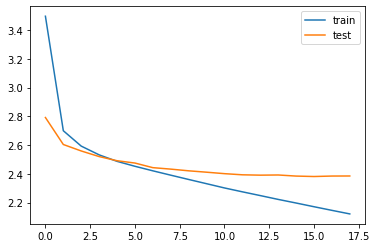

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

### 테스트

In [ ]:
#인코더 설계
encoder_model = Model(inputs = encoder_inputs, outputs=[encoder_outputs,
                                                        state_h, state_c])

In [ ]:
#디코더
#이전 시점의 상태들을 저장하는 텐서
decoder_state_input_h = Input(shape=(256,))
decoder_state_input_c = Input(shape=(256,))

dec_emb2 = dec_emb_layer(decoder_inputs)

decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2,
                                                    initial_state=[decoder_state_input_h, decoder_state_input_c])

In [ ]:
# 어텐션 함수
decoder_hidden_state_input = Input(shape=(text_max_len, 256))
attn_out_inf, attn_states_inf = attn_layer([decoder_hidden_state_input, decoder_outputs2])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# 디코더의 출력층
decoder_outputs2 = decoder_softmax_layer(decoder_inf_concat) 

# 최종 디코더 모델
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])

In [ ]:
sos=tokenizer.encode('[PAD]').ids[0]
end=tokenizer.encode('[UNK]').ids[0]

In [ ]:
#테스트모델
def decode_sequence(input_seq):
    # 입력으로부터 인코더의 상태를 얻음
    e_out, e_h, e_c = encoder_model.predict(input_seq)

     # <SOS>에 해당하는 토큰 생성
    target_seq = np.zeros((1,1))
    target_seq[0, 0] = sos

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition: # stop_condition이 True가 될 때까지 루프 반복

        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = tokenizer.decode([sampled_token_index])

        if(sampled_token!='[UNK]'):
            decoded_sentence += ' '+sampled_token

        #  <eos>에 도달하거나 최대 길이를 넘으면 중단.
        if (sampled_token == '[UNK]'  or len(decoded_sentence.split()) >= (title_max_len-1)):
            stop_condition = True

        # 길이가 1인 타겟 시퀀스를 업데이트
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # 상태를 업데이트 합니다.
        e_h, e_c = h, c

    return decoded_sentence


In [ ]:
# 원문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2text(input_seq):
    sentence=''
    for i in input_seq:
        if(i!=0):
            sentence = sentence + tokenizer.decode(input_seq)+' '
    return sentence

# 요약문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2summary(input_seq):
    sentence=''
    for i in input_seq:
        if((i!=0 and i!=sos) and i!=end):
            sentence = sentence + tokenizer.decode(i) + ' '
    return sentence

In [ ]:
for i in range(670,675):
    print("원문 : ",seq2text(encoder_input_test[i]))
    print("실제 요약문 :",seq2text(decoder_input_test[i]))
    print("예측 요약문 :",decode_sequence(encoder_input_test[i].reshape(1, text_max_len)))
    print("\n")

원문 :  시 공 사 세계 문학 숲 권 ] 영국 에드 거 앨런 포 러시아 안 톤 체 호 프 더불어 세계 대 단편 작가 평가 받는 기 드 모 파 상의 걸작 단편 선 집 ] 여 편 달 하는 그의 중 단 편 중 열 세 편 엄 선 하여 선 보이는 이번 선 집 그의 작품 세계가 보여주는 폭 넓 스펙 트 럼 최대한 전달 할 있도록 구성 되었다 ] ] 시 공 사 세계 문학 숲 권 ] 영국 에드 거 앨런 포 러시아 안 톤 체 호 프 더불어 세계 대 단편 작가 평가 받는 기 드 모 파 상의 걸작 단편 선 집 ] 여 편 달 하는 그의 중 단 편 중 열 세 편 엄 선 하여 선 보이는 이번 선 집 그의 작품 세계가 보여주는 폭 넓 스펙 트 럼 최대한 전달 할 있도록 구성 되었다 ] ] 시 공 사 세계 문학 숲 권 ] 영국 에드 거 앨런 포 러시아 안 톤 체 호 프 더불어 세계 대 단편 작가 평가 받는 기 드 모 파 상의 걸작 단편 선 집 ] 여 편 달 하는 그의 중 단 편 중 열 세 편 엄 선 하여 선 보이는 이번 선 집 그의 작품 세계가 보여주는 폭 넓 스펙 트 럼 최대한 전달 할 있도록 구성 되었다 ] ] 시 공 사 세계 문학 숲 권 ] 영국 에드 거 앨런 포 러시아 안 톤 체 호 프 더불어 세계 대 단편 작가 평가 받는 기 드 모 파 상의 걸작 단편 선 집 ] 여 편 달 하는 그의 중 단 편 중 열 세 편 엄 선 하여 선 보이는 이번 선 집 그의 작품 세계가 보여주는 폭 넓 스펙 트 럼 최대한 전달 할 있도록 구성 되었다 ] ] 시 공 사 세계 문학 숲 권 ] 영국 에드 거 앨런 포 러시아 안 톤 체 호 프 더불어 세계 대 단편 작가 평가 받는 기 드 모 파 상의 걸작 단편 선 집 ] 여 편 달 하는 그의 중 단 편 중 열 세 편 엄 선 하여 선 보이는 이번 선 집 그의 작품 세계가 보여주는 폭 넓 스펙 트 럼 최대한 전달 할 있도록 구성 되었다 ] ] 시 공 사 세계 문학 숲 권 ] 영국 에드 거 앨런 포 러시아 안 톤 체 호 프 더불어 세계 대 단편 작가 평가 받는 기 드

In [ ]:
print("원문 : ",seq2text(encoder_input_test[202]))
print("실제 요약문 :",seq2text(decoder_input_test[202]))
print("예측 요약문 :",decode_sequence(encoder_input_test[202].reshape(1, text_max_len)))
print("\n")

원문 :  수학 주제 들을 수학 자들의 목소리를 통해 이야기 형식 으로 들려 주는 수학 자가 들려 주는 수학 이야기 시리즈 ] 수학 교과서 내용을 생동감 있게 재구성 였 으며 중간중간에 수학 자들의 에피소드 곁 들여 읽는 재미를 더 했다 ] 먼저 수학 자의 업 적을 개 략 적으로 소개 하고 개의 강 의를 통해 수학 개념 ] ] 수학 주제 들을 수학 자들의 목소리를 통해 이야기 형식 으로 들려 주는 수학 자가 들려 주는 수학 이야기 시리즈 ] 수학 교과서 내용을 생동감 있게 재구성 였 으며 중간중간에 수학 자들의 에피소드 곁 들여 읽는 재미를 더 했다 ] 먼저 수학 자의 업 적을 개 략 적으로 소개 하고 개의 강 의를 통해 수학 개념 ] ] 수학 주제 들을 수학 자들의 목소리를 통해 이야기 형식 으로 들려 주는 수학 자가 들려 주는 수학 이야기 시리즈 ] 수학 교과서 내용을 생동감 있게 재구성 였 으며 중간중간에 수학 자들의 에피소드 곁 들여 읽는 재미를 더 했다 ] 먼저 수학 자의 업 적을 개 략 적으로 소개 하고 개의 강 의를 통해 수학 개념 ] ] 수학 주제 들을 수학 자들의 목소리를 통해 이야기 형식 으로 들려 주는 수학 자가 들려 주는 수학 이야기 시리즈 ] 수학 교과서 내용을 생동감 있게 재구성 였 으며 중간중간에 수학 자들의 에피소드 곁 들여 읽는 재미를 더 했다 ] 먼저 수학 자의 업 적을 개 략 적으로 소개 하고 개의 강 의를 통해 수학 개념 ] ] 수학 주제 들을 수학 자들의 목소리를 통해 이야기 형식 으로 들려 주는 수학 자가 들려 주는 수학 이야기 시리즈 ] 수학 교과서 내용을 생동감 있게 재구성 였 으며 중간중간에 수학 자들의 에피소드 곁 들여 읽는 재미를 더 했다 ] 먼저 수학 자의 업 적을 개 략 적으로 소개 하고 개의 강 의를 통해 수학 개념 ] ] 수학 주제 들을 수학 자들의 목소리를 통해 이야기 형식 으로 들려 주는 수학 자가 들려 주는 수학 이야기 시리즈 ] 수학 교과서 내용을 생동감 있게 재구성 였 으며 중간중간에 수학 자들의

In [ ]:
print("원문 : ",seq2text(encoder_input_test[401]))
print("실제 요약문 :",seq2text(decoder_input_test[401]))
print("예측 요약문 :",decode_sequence(encoder_input_test[401].reshape(1, text_max_len)))
print("\n")

원문 :  초등학교 과학 교과서 실 린 개념 총 망 라 과학 사전 초등학생 과학 사 전 초등학교 교과서 지도 서 나오는 개념 아이들이 이해하기 쉽 도록 엮 책 입니다 ] 지구 물질 생명 에너 지의 네 부분 으로 나누 어 가나다 순 으로 정리 였 으며 실험 내용과 관련 사진 삽 화를 풍부 하게 실 어 어린이들이 ] ] 초등학교 과학 교과서 실 린 개념 총 망 라 과학 사전 초등학생 과학 사 전 초등학교 교과서 지도 서 나오는 개념 아이들이 이해하기 쉽 도록 엮 책 입니다 ] 지구 물질 생명 에너 지의 네 부분 으로 나누 어 가나다 순 으로 정리 였 으며 실험 내용과 관련 사진 삽 화를 풍부 하게 실 어 어린이들이 ] ] 초등학교 과학 교과서 실 린 개념 총 망 라 과학 사전 초등학생 과학 사 전 초등학교 교과서 지도 서 나오는 개념 아이들이 이해하기 쉽 도록 엮 책 입니다 ] 지구 물질 생명 에너 지의 네 부분 으로 나누 어 가나다 순 으로 정리 였 으며 실험 내용과 관련 사진 삽 화를 풍부 하게 실 어 어린이들이 ] ] 초등학교 과학 교과서 실 린 개념 총 망 라 과학 사전 초등학생 과학 사 전 초등학교 교과서 지도 서 나오는 개념 아이들이 이해하기 쉽 도록 엮 책 입니다 ] 지구 물질 생명 에너 지의 네 부분 으로 나누 어 가나다 순 으로 정리 였 으며 실험 내용과 관련 사진 삽 화를 풍부 하게 실 어 어린이들이 ] ] 초등학교 과학 교과서 실 린 개념 총 망 라 과학 사전 초등학생 과학 사 전 초등학교 교과서 지도 서 나오는 개념 아이들이 이해하기 쉽 도록 엮 책 입니다 ] 지구 물질 생명 에너 지의 네 부분 으로 나누 어 가나다 순 으로 정리 였 으며 실험 내용과 관련 사진 삽 화를 풍부 하게 실 어 어린이들이 ] ] 초등학교 과학 교과서 실 린 개념 총 망 라 과학 사전 초등학생 과학 사 전 초등학교 교과서 지도 서 나오는 개념 아이들이 이해하기 쉽 도록 엮 책 입니다 ] 지구 물질 생명 에너 지의 네 부분 으로 나누 어 가나다 순 으로 정리 였 으며 

In [ ]:
print("원문 : ",seq2text(encoder_input_test[1050]))
print("실제 요약문 :",seq2text(decoder_input_test[1050]))
print("예측 요약문 :",decode_sequence(encoder_input_test[1050].reshape(1, text_max_len)))
print("\n")

원문 :  금 융 시장 역사와 현재 미래 펼쳐 보이는 탄탄한 내용을 갖추고 있는 경제 금 융 관한 입 문 서 이다 ] 심리 학 과학 사이 오 가는 투자 묘미 주식 채 권 파 생 상 품이 결합 하고 무 분 별한 거 래 이루어 질 때 발생 하는 위험 수학 적인 시장 분 석 치명 적 오류 증 권 시장 에서 일어나는 모든 일에 대하여 상 세 하게 설명 하고 있다 ] ] 금 융 시장 역사와 현재 미래 펼쳐 보이는 탄탄한 내용을 갖추고 있는 경제 금 융 관한 입 문 서 이다 ] 심리 학 과학 사이 오 가는 투자 묘미 주식 채 권 파 생 상 품이 결합 하고 무 분 별한 거 래 이루어 질 때 발생 하는 위험 수학 적인 시장 분 석 치명 적 오류 증 권 시장 에서 일어나는 모든 일에 대하여 상 세 하게 설명 하고 있다 ] ] 금 융 시장 역사와 현재 미래 펼쳐 보이는 탄탄한 내용을 갖추고 있는 경제 금 융 관한 입 문 서 이다 ] 심리 학 과학 사이 오 가는 투자 묘미 주식 채 권 파 생 상 품이 결합 하고 무 분 별한 거 래 이루어 질 때 발생 하는 위험 수학 적인 시장 분 석 치명 적 오류 증 권 시장 에서 일어나는 모든 일에 대하여 상 세 하게 설명 하고 있다 ] ] 금 융 시장 역사와 현재 미래 펼쳐 보이는 탄탄한 내용을 갖추고 있는 경제 금 융 관한 입 문 서 이다 ] 심리 학 과학 사이 오 가는 투자 묘미 주식 채 권 파 생 상 품이 결합 하고 무 분 별한 거 래 이루어 질 때 발생 하는 위험 수학 적인 시장 분 석 치명 적 오류 증 권 시장 에서 일어나는 모든 일에 대하여 상 세 하게 설명 하고 있다 ] ] 금 융 시장 역사와 현재 미래 펼쳐 보이는 탄탄한 내용을 갖추고 있는 경제 금 융 관한 입 문 서 이다 ] 심리 학 과학 사이 오 가는 투자 묘미 주식 채 권 파 생 상 품이 결합 하고 무 분 별한 거 래 이루어 질 때 발생 하는 위험 수학 적인 시장 분 석 치명 적 오류 증 권 시장 에서 일어나는 모든 일에 대하여 상 세 하게 설명 하고 있다 ] ] 금 융 

In [ ]:
print("원문 : ",seq2text(encoder_input_test[673]))
print("실제 요약문 :",seq2text(decoder_input_test[673]))
print("예측 요약문 :",decode_sequence(encoder_input_test[673].reshape(1, text_max_len)))
print("\n")

원문 :  y ] 인 문 사회 학 습 만화 시리즈 권 ] 자의 기원 탄생 자의 생 성 원 리와 부 수의 활용 등을 담 았다 ] 수많은 자의 기초 되는 기본 자와 자 쓰는 법 비슷 하거나 헷갈 리기 쉬운 자 다양한 자와 활용 법을 알려 준다 ] 더불어 자를 연결 하여 의미를 만드는 법 흥미로운 이야기가 담긴 고사 성 어 천 자 문에 얽 힌 이야기와 의미 대해서도 자세히 소개 하고 있다 ] ] y ] 인 문 사회 학 습 만화 시리즈 권 ] 자의 기원 탄생 자의 생 성 원 리와 부 수의 활용 등을 담 았다 ] 수많은 자의 기초 되는 기본 자와 자 쓰는 법 비슷 하거나 헷갈 리기 쉬운 자 다양한 자와 활용 법을 알려 준다 ] 더불어 자를 연결 하여 의미를 만드는 법 흥미로운 이야기가 담긴 고사 성 어 천 자 문에 얽 힌 이야기와 의미 대해서도 자세히 소개 하고 있다 ] ] y ] 인 문 사회 학 습 만화 시리즈 권 ] 자의 기원 탄생 자의 생 성 원 리와 부 수의 활용 등을 담 았다 ] 수많은 자의 기초 되는 기본 자와 자 쓰는 법 비슷 하거나 헷갈 리기 쉬운 자 다양한 자와 활용 법을 알려 준다 ] 더불어 자를 연결 하여 의미를 만드는 법 흥미로운 이야기가 담긴 고사 성 어 천 자 문에 얽 힌 이야기와 의미 대해서도 자세히 소개 하고 있다 ] ] y ] 인 문 사회 학 습 만화 시리즈 권 ] 자의 기원 탄생 자의 생 성 원 리와 부 수의 활용 등을 담 았다 ] 수많은 자의 기초 되는 기본 자와 자 쓰는 법 비슷 하거나 헷갈 리기 쉬운 자 다양한 자와 활용 법을 알려 준다 ] 더불어 자를 연결 하여 의미를 만드는 법 흥미로운 이야기가 담긴 고사 성 어 천 자 문에 얽 힌 이야기와 의미 대해서도 자세히 소개 하고 있다 ] ] y ] 인 문 사회 학 습 만화 시리즈 권 ] 자의 기원 탄생 자의 생 성 원 리와 부 수의 활용 등을 담 았다 ] 수많은 자의 기초 되는 기본 자와 자 쓰는 법 비슷 하거나 헷갈 리기 쉬운 자 다양한 자와 활용 법을 알려 준다 ] 더불어 자를 연

## 모델2

In [ ]:
#인코더
encoder_inputs = Input(shape=(text_max_len,))

#인코더의 임베딩층
enc_emb = Embedding(30000, 128)(encoder_inputs)

#인코더 LSTM 1
enc_lstm1 = LSTM(256,activation='tanh',recurrent_activation='sigmoid', 
                 return_sequences=True, return_state=True ,
                         recurrent_dropout=0, unroll=False, use_bias=True, dropout=0.4)
encoder_output1, state_h1, state_c1 = enc_lstm1(enc_emb)

#LSTM 2
enc_lstm2 = LSTM(256,activation='tanh',recurrent_activation='sigmoid',
                 return_sequences=True, return_state=True ,
                         recurrent_dropout=0, unroll=False, use_bias=True, dropout=0.4)
encoder_output2, state_h2, state_c2 = enc_lstm2(encoder_output1)

#LSTM 2
enc_lstm3 = LSTM(256,activation='tanh',recurrent_activation='sigmoid',
                 return_sequences=True, return_state=True ,
                         recurrent_dropout=0, unroll=False, use_bias=True, dropout=0.4)
encoder_output3, state_h3, state_c3 = enc_lstm3(encoder_output2)


#LSTM 3
enc_lstm3 = LSTM(256,activation='tanh',recurrent_activation='sigmoid',
                 return_sequences=True, return_state=True ,
                         recurrent_dropout=0, unroll=False, use_bias=True, dropout=0.4)
encoder_outputs, state_h, state_c= enc_lstm3(encoder_output3)


# 디코더
decoder_inputs = Input(shape=(None,))

# 디코더의 임베딩 층
dec_emb_layer = Embedding(30000, 128)
dec_emb = dec_emb_layer(decoder_inputs)

# 디코더의 LSTM
decoder_lstm = LSTM(256, return_sequences = True, return_state = True, 
                    dropout = 0.4
                    ,activation='tanh',recurrent_activation='sigmoid',
                    recurrent_dropout=0, unroll=False, use_bias=True)
#초기 상태를 인코더의 상태로 줘야함
decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state = [state_h, state_c])



# 어텐션 층(어텐션 함수)
attn_layer = AttentionLayer(name='attention_layer')
attn_out, attn_states = attn_layer([encoder_outputs, decoder_outputs])

# 어텐션의 결과와 디코더의 hidden state들을 연결
decoder_concat_input = Concatenate(axis = -1, name='concat_layer')([decoder_outputs, attn_out])

# 디코더의 출력층
decoder_softmax_layer = Dense(30000, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_concat_input)

# 모델 정의
model1 = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model1.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 84)]         0           []                               
                                                                                                  
 embedding_7 (Embedding)        (None, 84, 128)      3840000     ['input_11[0][0]']               
                                                                                                  
 lstm_14 (LSTM)                 [(None, 84, 256),    394240      ['embedding_7[0][0]']            
                                 (None, 256),                                                     
                                 (None, 256)]                                                     
                                                                                            

In [ ]:
model1.compile(loss='sparse_categorical_crossentropy', optimizer='adam')

es = EarlyStopping(monitor='val_loss', mode='min', verbose=2, patience = 2)
history = model1.fit(x = [encoder_input_train, decoder_input_train], y = decoder_target_train,
          validation_data = ([encoder_input_test, decoder_input_test], decoder_target_test),
          batch_size = 256, callbacks=[es], epochs = 50)

Epoch 1/50
86/86 [==============================] - 58s 567ms/step - loss: 4.0734 - val_loss: 2.9202
Epoch 2/50
86/86 [==============================] - 48s 559ms/step - loss: 2.8229 - val_loss: 2.7070
Epoch 3/50
86/86 [==============================] - 49s 567ms/step - loss: 2.6451 - val_loss: 2.5984
Epoch 4/50
86/86 [==============================] - 49s 567ms/step - loss: 2.5732 - val_loss: 2.5629
Epoch 5/50
86/86 [==============================] - 49s 566ms/step - loss: 2.5283 - val_loss: 2.5312
Epoch 6/50
86/86 [==============================] - 49s 565ms/step - loss: 2.4909 - val_loss: 2.5096
Epoch 7/50
86/86 [==============================] - 51s 589ms/step - loss: 2.4567 - val_loss: 2.4905
Epoch 8/50
86/86 [==============================] - 50s 585ms/step - loss: 2.4208 - val_loss: 2.4749
Epoch 9/50
86/86 [==============================] - 50s 579ms/step - loss: 2.3932 - val_loss: 2.4670
Epoch 10/50
86/86 [==============================] - 50s 579ms/step - loss: 2.3634 - val_lo

In [ ]:
#인코더 설계
encoder_model = Model(inputs = encoder_inputs, outputs=[encoder_outputs,
                                                        state_h, state_c])

#디코더
#이전 시점의 상태들을 저장하는 텐서
decoder_state_input_h = Input(shape=(256,))
decoder_state_input_c = Input(shape=(256,))

dec_emb2 = dec_emb_layer(decoder_inputs)

decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2,
                                                    initial_state=[decoder_state_input_h, decoder_state_input_c])

# 어텐션 함수
decoder_hidden_state_input = Input(shape=(text_max_len, 256))
attn_out_inf, attn_states_inf = attn_layer([decoder_hidden_state_input, decoder_outputs2])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# 디코더의 출력층
decoder_outputs2 = decoder_softmax_layer(decoder_inf_concat) 

# 최종 디코더 모델
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])


In [ ]:
#테스트모델
def decode_sequence(input_seq):
    # 입력으로부터 인코더의 상태를 얻음
    e_out, e_h, e_c = encoder_model.predict(input_seq)

     # <SOS>에 해당하는 토큰 생성
    target_seq = np.zeros((1,1))
    target_seq[0, 0] = sos

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition: # stop_condition이 True가 될 때까지 루프 반복

        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = tokenizer.decode([sampled_token_index])

        if(sampled_token!='[UNK]'):
            decoded_sentence += ' '+sampled_token

        #  <eos>에 도달하거나 최대 길이를 넘으면 중단.
        if (sampled_token == '[UNK]'  or len(decoded_sentence.split()) >= (title_max_len-1)):
            stop_condition = True

        # 길이가 1인 타겟 시퀀스를 업데이트
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # 상태를 업데이트 합니다.
        e_h, e_c = h, c

    return decoded_sentence

# 원문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2text(input_seq):
    sentence=''
    for i in input_seq:
        if(i!=0):
            sentence = sentence + tokenizer.decode(input_seq)+' '
    return sentence

# 요약문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2summary(input_seq):
    sentence=''
    for i in input_seq:
        if((i!=0 and i!=sos) and i!=end):
            sentence = sentence + tokenizer.decode(i) + ' '
    return sentence

In [ ]:
for i in range(900,905):
    print("원문 : ",seq2text(encoder_input_test[i]))
    print("실제 요약문 :",seq2text(decoder_input_test[i]))
    print("예측 요약문 :",decode_sequence(encoder_input_test[i].reshape(1, text_max_len)))
    print("\n")

원문 :  개인 이나 의사 한두 명 아닌 국내 최초 소 전문 원 함 소 에서 년 동안 만 명 이상의 아이들을 진 료 하면서 쌓 임상 노 우를 바탕으로 만든 이유 식에 관한 모든 정보 담은 책이 ] ] 개인 이나 의사 한두 명 아닌 국내 최초 소 전문 원 함 소 에서 년 동안 만 명 이상의 아이들을 진 료 하면서 쌓 임상 노 우를 바탕으로 만든 이유 식에 관한 모든 정보 담은 책이 ] ] 개인 이나 의사 한두 명 아닌 국내 최초 소 전문 원 함 소 에서 년 동안 만 명 이상의 아이들을 진 료 하면서 쌓 임상 노 우를 바탕으로 만든 이유 식에 관한 모든 정보 담은 책이 ] ] 개인 이나 의사 한두 명 아닌 국내 최초 소 전문 원 함 소 에서 년 동안 만 명 이상의 아이들을 진 료 하면서 쌓 임상 노 우를 바탕으로 만든 이유 식에 관한 모든 정보 담은 책이 ] ] 개인 이나 의사 한두 명 아닌 국내 최초 소 전문 원 함 소 에서 년 동안 만 명 이상의 아이들을 진 료 하면서 쌓 임상 노 우를 바탕으로 만든 이유 식에 관한 모든 정보 담은 책이 ] ] 개인 이나 의사 한두 명 아닌 국내 최초 소 전문 원 함 소 에서 년 동안 만 명 이상의 아이들을 진 료 하면서 쌓 임상 노 우를 바탕으로 만든 이유 식에 관한 모든 정보 담은 책이 ] ] 개인 이나 의사 한두 명 아닌 국내 최초 소 전문 원 함 소 에서 년 동안 만 명 이상의 아이들을 진 료 하면서 쌓 임상 노 우를 바탕으로 만든 이유 식에 관한 모든 정보 담은 책이 ] ] 개인 이나 의사 한두 명 아닌 국내 최초 소 전문 원 함 소 에서 년 동안 만 명 이상의 아이들을 진 료 하면서 쌓 임상 노 우를 바탕으로 만든 이유 식에 관한 모든 정보 담은 책이 ] ] 개인 이나 의사 한두 명 아닌 국내 최초 소 전문 원 함 소 에서 년 동안 만 명 이상의 아이들을 진 료 하면서 쌓 임상 노 우를 바탕으로 만든 이유 식에 관한 모든 정보 담은 책이 ] ] 개인 이나 의사 한두 명 아닌 국내 최초 소 전문 원 함 소 에서 년 동

In [ ]:
print("원문 : ",seq2text(encoder_input_test[902]))
print("실제 요약문 :",seq2text(decoder_input_test[902]))
print("예측 요약문 :",decode_sequence(encoder_input_test[902].reshape(1, text_max_len)))
print("\n")

원문 :  한국 주식 시장 지루한 박스 권을 형성 했던 이유 대세 상 승 언제 어떻게 오는 지 미국 달 러 한국 주식 시장 어떻게 연결 되었 는지 도 업 종 어떻게 찾을 것인지 그 비밀을 알려준 ] 주식 시장 큰 흐름이 만들어 지는 원 리와 이유를 알면 주식 투자 쉽고 즐거 울 것이다 ] ] 한국 주식 시장 지루한 박스 권을 형성 했던 이유 대세 상 승 언제 어떻게 오는 지 미국 달 러 한국 주식 시장 어떻게 연결 되었 는지 도 업 종 어떻게 찾을 것인지 그 비밀을 알려준 ] 주식 시장 큰 흐름이 만들어 지는 원 리와 이유를 알면 주식 투자 쉽고 즐거 울 것이다 ] ] 한국 주식 시장 지루한 박스 권을 형성 했던 이유 대세 상 승 언제 어떻게 오는 지 미국 달 러 한국 주식 시장 어떻게 연결 되었 는지 도 업 종 어떻게 찾을 것인지 그 비밀을 알려준 ] 주식 시장 큰 흐름이 만들어 지는 원 리와 이유를 알면 주식 투자 쉽고 즐거 울 것이다 ] ] 한국 주식 시장 지루한 박스 권을 형성 했던 이유 대세 상 승 언제 어떻게 오는 지 미국 달 러 한국 주식 시장 어떻게 연결 되었 는지 도 업 종 어떻게 찾을 것인지 그 비밀을 알려준 ] 주식 시장 큰 흐름이 만들어 지는 원 리와 이유를 알면 주식 투자 쉽고 즐거 울 것이다 ] ] 한국 주식 시장 지루한 박스 권을 형성 했던 이유 대세 상 승 언제 어떻게 오는 지 미국 달 러 한국 주식 시장 어떻게 연결 되었 는지 도 업 종 어떻게 찾을 것인지 그 비밀을 알려준 ] 주식 시장 큰 흐름이 만들어 지는 원 리와 이유를 알면 주식 투자 쉽고 즐거 울 것이다 ] ] 한국 주식 시장 지루한 박스 권을 형성 했던 이유 대세 상 승 언제 어떻게 오는 지 미국 달 러 한국 주식 시장 어떻게 연결 되었 는지 도 업 종 어떻게 찾을 것인지 그 비밀을 알려준 ] 주식 시장 큰 흐름이 만들어 지는 원 리와 이유를 알면 주식 투자 쉽고 즐거 울 것이다 ] ] 한국 주식 시장 지루한 박스 권을 형성 했던 이유 대세 상 승 언제 어떻게 오는 지